In [1]:
# Dataset: Amazon Books Reviews
# Author: Mohamed Bekheet
# Source: Mohamed Bekheet. (2022). Amazon Books Reviews [Data set]. Kaggle. https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# URL: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# This dataset contains 2 files
# The first file** reviews** file contain feedback about 3M user on 212404 unique books the data set is 
# part of the Amazon review Dataset it contains product reviews and metadata from Amazon, including 
# 142.8 million reviews spanning May 1996 - July 2014.
# Reviews Dataset Data Dictionary:
# -id:                  The Id of Book
# -Title:   	        Book Title
# -Price:               The price of Book
# -User_id:             Id of the user who rates the book
# -profileName:         Name of the user who rates the book
# -review/helpfulness:  helpfulness rating of the review, e.g. 2/3
# -review/score:        rating from 0 to 5 for the book
# -review/time:         time of given the review
# -review/summary:      the summary of a text review
# -review/text:         the full text of a review

# The second file Books Details file contains details information about 212404 unique books it file is built by using
# google books API to get details information about books it rated in the first file
# and this file contains

# Book Details Dataset Data Dictionary:
# Title:	        Book Title
# Descripe:	        Decription of book
# authors:	        Name of book authors
# image:	        Url for book cover
# previewLink:	    Link to access this book on google Books
# publisher:	    Name of the publisheer
# publishedDate:	The date of publish
# infoLink:	        Link to get more information about the book on google books
# categories:	    Genres of books
# ratingsCount:	    Averaging rating for book

# Both Datasets are linked through the unique tittle of the book.

In [2]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from dateutil.parser import parse
from datetime import datetime
# ------------  PREPROCESING -------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#-------------- TRANSFORMERS --------------
import transformers
from transformers.pipelines import PIPELINE_REGISTRY
from transformers import pipeline
import evaluate
from evaluate import load
from transformers import Conversation
transformers.logging.set_verbosity_error()

/home/arnaldochm/Documents/BootCamp_DataScience/Final_Project/final_project_nlp/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-10-29 21:58:10.111687: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-29 21:58:10.126013: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-29 21:58:10.210652: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-29 21:58:10.211622: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimize

In [3]:
#Loading the Datasets
df_rating_raw = pd.read_csv('../data/raw/Books_rating.csv')

df_rating_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [4]:
df_rating_raw[df_rating_raw['Title'] == 'West Side story']

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
1814312,B000711OZC,West Side story,NaN,A3FV7U97W17PK,"M. Chaerani ""music sheet collector""",26/26,5.0,1145491200,Great transcription of the full score,If you're looking for a faithful translation f...
1814313,B000711OZC,West Side story,NaN,A14ES1GLFF6RZ9,"The Pianoman ""Producer/Arranger""",6/7,5.0,1189987200,West Side Vocal Score,If you want to play/arrange/orchestrate or sim...
1814314,B000711OZC,West Side story,NaN,APYTEBHJXFT18,Teen,4/5,4.0,1167177600,For the intermediate,The book is medium-it isn't an easy book you o...
1814315,B000711OZC,West Side story,NaN,A3H9EZYOVG81TW,Broadway Fan,1/1,5.0,1332374400,West Side Story,This book is perfect. We are rehearsing West S...
1814316,B000711OZC,West Side story,NaN,A1IWMVQGALYNVK,C. Morgan,3/4,5.0,1199145600,High Quality Printing,The piano and vocals are clearly printed which...
1814317,B000711OZC,West Side story,NaN,AZUS7ZIZWEJ0B,"Rebecca L. Gosselin ""Capegirl78""",0/0,5.0,1355702400,Fab!,this was perfect - I wanted to real versions o...
1814318,B000711OZC,West Side story,NaN,A1F2FPNK5VBJZ4,"W. Smith ""Future Tony Winner""",0/0,5.0,1264636800,A Composer/Orchestrator's Best Friend,My original intention was to buy this and use ...
1814319,B000711OZC,West Side story,NaN,A2DGD1PGXR5BZM,Olivertrst,0/1,3.0,1319241600,Disappointed -- Bent in shipping,I was disappointed when I received this book i...
1814320,B000711OZC,West Side story,NaN,A1GURUV4HPAWFU,Krista Cronin,2/9,5.0,955411200,West Side Story is Fabulous,"The music from West Side Story is captivating,..."


In [5]:
df_rating_raw.sample(10)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
1786759,0201821362,Languages and Machines: An Introduction to the...,NaN,A7AAKC3HEI2CY,Rasib,0/1,3.0,1348704000,"""OK"" Condition",Even though I received the book within the exp...
1900229,B000234N6M,Porno,NaN,A2Q2CP11RNVTVQ,H. Neill Jameson,1/1,5.0,1035072000,You can go home again,After being held by the final 150 pages of Wel...
803310,1561034371,The Red Badge of Courage (Lake Illustrated Cla...,14.95,A16X7GKCK83WUE,"Matthew Bratkowski ""mattster""",3/3,2.0,1046649600,Not great,Stephen Crane never actually fought in battle ...
2980683,1582182485,The Innocents Abroad,34.95,A2EWCVGOTTPFAZ,miked99,5/8,5.0,1014422400,Splendidly Enjoyable,&quot;The Innocents Abroad&quot; is Mark Twain...
2901605,B000PRSHE4,Crime and Punishment,NaN,ANQW5H8ZCG5LZ,Eric Hobart,0/0,5.0,1264118400,"Well worthy of being defined as ""classic"" lite...","When I first picked up this book, I assumed th..."
407594,B000L4056E,The Fellowship of the Ring,NaN,A6225HHQKBE2M,Jake Stitch,1/1,5.0,1028592000,Listen to the Fellowship,"J.R.R. Tolkien's epic novel ""The Lord of the R..."
1966920,0304352896,History of Warfare: Warfare in the Seventeenth...,NaN,A3L8R6HQ8JGMKK,Mark Klobas,0/0,5.0,1207958400,A good introduction to warfare in early modern...,Summarizing a century of warfare in approximat...
1208330,0971015805,Case in Point: Complete Case Interview Prepara...,NaN,NaN,NaN,3/9,3.0,1001721600,"average, but vault case guide is superior","In my opinion, this book was not really worth ..."
2564363,B00069X4Q2,Scenes of clerical life (Novels of George Eliot),NaN,A1G37DFO8MQW0M,"C. M Mills ""Michael Mills""",10/12,5.0,1191801600,George Eliot's first published fictional work ...,George Eliot (Mary Ann Evans) was born in Warw...
1665839,B000KRL0SO,THE ARK,NaN,A3N8RZSXKN1OR2,Chrijeff,9/10,5.0,1096502400,Why doesn't somebody reprint this?!,"""The Ark"" has to be one of the three best YA n..."


In [6]:
#Load Books Data Dataset
df_data_raw = pd.read_csv('../data/raw/books_data.csv')

df_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [7]:
df_data_raw.sample(10)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
126859,"Teach Yourself One-Day French, DVD Edition","Includes, beginning Sept. 15, 1954 (and on the...","['Melvil Dewey', 'Richard Rogers Bowker', 'L. ...",http://books.google.com/books/content?id=gY3hA...,http://books.google.nl/books?id=gY3hAAAAMAAJ&q...,NaN,2007,http://books.google.nl/books?id=gY3hAAAAMAAJ&d...,['Libraries'],NaN
13915,Course in Isaac Pitman shorthand,This work has been selected by scholars as bei...,['Sir Isaac Pitman'],http://books.google.com/books/content?id=gdVKz...,http://books.google.nl/books?id=gdVKzQEACAAJ&d...,Wentworth Press,2019-04-12,http://books.google.nl/books?id=gdVKzQEACAAJ&d...,NaN,NaN
188477,Karl Marx's theory of history: A defence,"First published in 1978, this book rapidly est...",['G. A. Cohen'],http://books.google.com/books/content?id=H2bcD...,http://books.google.com/books?id=H2bcDwAAQBAJ&...,Princeton University Press,2020-05-26,https://play.google.com/store/books/details?id...,['Philosophy'],NaN
130820,Audubon Engagement Diary Calendar 2006,NaN,NaN,http://books.google.com/books/content?id=0tupe...,http://books.google.nl/books?id=0tupe9rNj0YC&q...,NaN,1987,http://books.google.nl/books?id=0tupe9rNj0YC&d...,['American literature'],NaN
23831,Country Baking: Simple Home Baking with Wholes...,"Presents recipes for quick breads, yeast bread...",['Ken Haedrich'],http://books.google.com/books/content?id=w9ENA...,http://books.google.com/books?id=w9ENAAAACAAJ&...,NaN,1999,http://books.google.com/books?id=w9ENAAAACAAJ&...,['Cooking'],NaN
141929,The Mirror Looks Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113045,Strange Customs of Courtship and Marriage,NaN,NaN,NaN,http://books.google.nl/books?id=0rRfNQEACAAJ&d...,NaN,1943,http://books.google.nl/books?id=0rRfNQEACAAJ&d...,['Courtship'],1.0
121138,CLEP American Literature (College Level Examin...,Earn College Credit with REA's Test Prep for C...,['Jacob Stratman'],http://books.google.com/books/content?id=HOOhD...,http://books.google.nl/books?id=HOOhDQAAQBAJ&p...,Research & Education Assoc.,2016-11-01,https://play.google.com/store/books/details?id...,['Study Aids'],NaN
27218,The Apocrypha; an American Translation,Provides a new English translation of the Apoc...,"['Edgar Johnson Goodspeed', 'Moses Hadas']",http://books.google.com/books/content?id=iLilc...,http://books.google.com/books?id=iLilcrHR1lkC&...,Vintage,1989,http://books.google.com/books?id=iLilcrHR1lkC&...,['Religion'],3.0
153795,"Uva's Guide To Cranes, Dollies, and Remote Heads","Uva's Guide To Cranes, Dollies, and Remote Hea...","['Michael Uva', 'Sabrina Uva']",http://books.google.com/books/content?id=d2qf5...,http://books.google.com/books?id=d2qf5tzmuVEC&...,Taylor & Francis,2013-07-24,http://books.google.com/books?id=d2qf5tzmuVEC&...,['Performing Arts'],1.0


In [8]:
#Revisar Valores Nulos
df_rating_raw.isna().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

In [9]:
df_data_raw.isna().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

In [10]:
#Innecesary Columns are removed
# df_rating: 
#   - Price: Almost 84% of the entries are null. 
#   - profileName: User_id provides same information.
#   - Id: Innecesary column.
#   - review/summary: Unncesary column for current analysis. Many summaries used are the same Book Title.  
# df_data:
#   - image, previewLink, infoLink: Not useful information.
#   - ratingsCount: Information from Google API. Not useful for the analysis.
#   - description: Non necesary information for Analysis

df_rating_processed = df_rating_raw.drop(['Id','profileName','Price','review/summary'], axis=1).copy()
df_data_processed = df_data_raw.drop(['image','previewLink','infoLink','ratingsCount','description'], axis=1).copy()

In [11]:
df_rating_processed.sample(10)

,Title,User_id,review/helpfulness,review/score,review/time,review/text
909629,Warrior's Song: Medieval Song Quartet #4,A3RUGGKGN72JQQ,13/18,5.0,984355200,Catherine Coulter has achieved what few writer...
1291849,A Taste of Reality,NaN,0/0,4.0,1046649600,I just found out about Ms. Roby and her writti...
35428,Hope Dies Last: Keeping The Faith In Troubled ...,A3TMWHHW2B3X8R,5/5,5.0,1239235200,Terkel's system of personal stories told throu...
1234582,The Warmest December,A230ZS8F6I0AGM,3/3,5.0,1122163200,For anyone who has had an abusive childhood wi...
2950397,The Eleventh Hour: A curious Mystery,A33DLAQ7I8JCF2,0/0,5.0,1315526400,"I am an elementary school teacher, and love an..."
2419813,Professional SQL Server 7.0 Programming,A2QMJSDUFBIT7C,1/2,5.0,972604800,"Yup, it's a really good book. I can't really t..."
2319374,THE RED BADGE OF COURAGE: AN EPISODE OF THE AM...,A2JJ5DZ5XH020X,0/0,3.0,1347580800,"Interesting, but not exciting. I had heard a l..."
576712,The characters of Theophrastus (Loeb classical...,A16NGS8RBNPE35,2/2,3.0,1259625600,"This text is absolutely hilarious, and also ri..."
1814,The Scarlet Letter A Romance,A2BZRYYBIU3TPH,2/2,4.0,1298160000,I was quite pleased with the condition of this...
1848563,"Lad, a dog",A27XUU2DXILHYZ,1/2,4.0,1313107200,This book is composed of twelve short stories ...


In [12]:
df_rating_processed = df_rating_processed.rename(columns={'Title':'title', 
                                                        'User_id':'user_id',
                                                        'review/helpfulness': 'helpfulness',
                                                        'review/score': 'review',
                                                        'review/time': 'review_time',
                                                        'review/text': 'text'
                                                        })
df_data_processed = df_data_processed.rename(columns={'Title':'title', 
                                                        'publishedDate':'published_date'
                                                        })

In [13]:
df_rating_processed.isna().sum()

title             208
user_id        561787
helpfulness         0
review              0
review_time         0
text                8
dtype: int64

In [14]:
df_data_processed.isna().sum()

title                 1
authors           31413
publisher         75886
published_date    25305
categories        41199
dtype: int64

In [15]:
#CLEAN THE DATASETS

In [16]:
#As both datasets are going to be merged by Title, Rows with Null Title are removed.
df_rating_processed = df_rating_processed.dropna(subset=['title', 'text'], how='any')

df_data_processed = df_data_processed.dropna(subset=['title'])

#Drop rows where everything except title is null
df_data_processed = df_data_processed.dropna(subset=['authors', 'publisher', 'published_date', 'categories'], how='all')

In [17]:
df_data_processed.sample(5)

,title,authors,publisher,published_date,categories
69992,Econometric Analysis of Cross Section and Pane...,['Jeffrey M. Wooldridge'],MIT Press,2010-10-01,['Business & Economics']
163516,The intercourse between the soul and the body:...,['Emanuel Swedenborg'],NaN,1950,['Cosmology']
118902,The warriors,['Sol Yurick'],Open Road + Grove/Atlantic,2007-12-01,['Fiction']
196884,Ginnie and the Mystery Doll,['Catherine Woolley'],William Morrow & Company,1960,['Cape Cod (Mass.)']
187757,Mary Anning and the Sea Dragon,"['Jeannine Atkins', 'Michael Dooling']",Createspace Independent Pub,2012-11-01,['Juvenile Nonfiction']


In [18]:
# Found 143 published_date entries with the format YYYY*
# Found 76 published_date entries with the format YYY?
# Found 52 published_date entries with the format YY??

def convert_to_year(date_in):    
    try:    
        patern_1 = r'\d\d\d\?'
        patern_2 = r'\d\d\?\?'

        #Some dates only contain the Year with the format YYYY*. For those cases, the symbol * is removed.
        date = date_in.replace('*', '')

        #Other cases contains an ? symbol instead of a number on the Year. YYY? or YY??
        #For this specific case, the rounded mean from 0 to 9 is used: 5
        if re.match(patern_1, date):
            date = date.replace('?', '5')

        if re.match(patern_2, date):
            return None

        date = parse(date)
        
        return date.strftime("%Y")
    except:        
        return None

In [19]:
#Use only the year for published_date
df_data_processed['published_year'] = df_data_processed['published_date'].apply(lambda x: convert_to_year(x) if pd.notna(x) else x)

df_data_processed['published_year'] = df_data_processed['published_year'].fillna('0')

df_data_processed['published_year'] = df_data_processed['published_year'].astype('int32')

#Drop published_date column 
df_data_processed = df_data_processed.drop(['published_date'], axis=1)

In [20]:
mean_published_year = int(df_data_processed['published_year'].mean())
mean_published_year

1981

In [21]:
df_data_processed['published_year'] = df_data_processed['published_year'].apply(lambda x: mean_published_year if x==0 else x)
df_data_processed.sample(10)

,title,authors,publisher,categories,published_year
194147,Rum: The Epic Story of the Drink That Conquere...,['Charles A. Coulombe'],Citadel Press,['Cooking'],2005
207821,"Strong Women, Strong Hearts","['Miriam E. Nelson', 'Alice H. Lichtenstein']",Penguin,['Health & Fitness'],2006
45177,24 Essential Lessons for Investment Success: L...,"[""William J. O'Neil""]",McGraw Hill Professional,['Business & Economics'],2000
59267,From Sight to Insight: The Writing Process,"['Jeff Rackham', 'Olivia Bertagnolli']",Harcourt School,['Business & Economics'],1991
109172,The Beebo Brinker Chronicles,['Ann Bannon'],HarperCollins Australia,['Fiction'],2014
60576,Exploring the Highest Sierra,['James Gregory Moore'],Stanford University Press,['Science'],2000
178354,Accidents in North American Mountaineering 1998,NaN,The Mountaineers Books,NaN,1981
98364,Cash McCall,['Cameron Hawley'],Open Road Media,['Fiction'],2015
199031,The Way of Jesus,['Mark Scandrette'],InterVarsity Press,['Religion'],2011
100327,The house of bondage,['Thavolia Glymph'],Cambridge University Press,['History'],2008


In [22]:
#Updating the Authors to a list.
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: x.replace("[", "") if pd.notna(x) else None)
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: x.replace("]", "") if pd.notna(x) else None)
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: x.replace("'", "") if pd.notna(x) else None)
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: [author for author in str(x).split(",")] if pd.notna(x) else None)

In [23]:
#Updating Categories to list
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: x.replace("[", "") if pd.notna(x) else None)
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: x.replace("]", "") if pd.notna(x) else None)
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: x.replace("'", "") if pd.notna(x) else None)
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: [category for category in str(x).split(",")] if pd.notna(x) else None)

In [24]:
df_data_processed.sample(10, random_state=20)

,title,authors,publisher,categories,published_year
134060,Galois theory;: Lectures delivered at the Univ...,[Emil Artin],Courier Corporation,[Mathematics],2012
2306,The Sunday Tertulia: A Novel,[Lori Marie Carlson],Harper Collins,[Fiction],2009
49270,Suddenly They're 13,[David and Claudia Arp],Zondervan,[Religion],2010
115253,BEYOND MONSTERS AND CLOWNS. THE COMBAT SS. : D...,[Karl H. Theile],University Press of Amer,[History],1997
120696,Virginians at home: Family life in the eightee...,[Edmund Sears Morgan],Colonial Williamsburg Foundation,[History],1952
194758,Food Choice and Obesity in Black America: Crea...,[Eric J. Bailey],Greenwood Publishing Group,[African Americans],2006
10043,Lake Geneva in Vintage Postcards (WI) (Postcar...,"[Carolyn Hope Smeltzer, Martha Kiefer Cucco]",Arcadia Publishing,[History],2005
16651,"Where Are You Going, Manyoni?",[Catherine Stock],Harpercollins Childrens Books,[Juvenile Fiction],1993
61146,Twenty One Days to a Trained Dog,"[Dick Maller, Jeffrey Feinman]",Simon and Schuster,[Pets],1979
55622,"The German campaigns in the Balkans (spring, 1...",[George E. Blau],NaN,"[World War, 1939-1945]",1986


In [25]:
df_rating_processed.sample(5)

,title,user_id,helpfulness,review,review_time,text
115125,Casting the First Stone,A2KO0GPRDD0QJM,3/3,5.0,965260800,Ms. Roby's book Casting the First Stone was a ...
116659,The One Minute ( -01) Manager - Increase Produ...,A22ZV6SYD73602,0/0,5.0,1359763200,I love this book because it is written in a pl...
944555,Mr. Gonopolis and His 12 Holsteins: A Christma...,A1TSAYI9P2PURY,0/0,2.0,1357776000,We are farmers and my kids didn't listen at al...
1987982,Atlas Shrugged,A1UZ4KN4OWMDSP,2/4,5.0,900201600,Atlas Shrugged is one of the few truly great p...
1501159,Personality Theories: A Comparative Analysis,A373H37M1QU7RR,11/12,5.0,950832000,"In this comprehensive and voluminous tome, Sal..."


In [26]:
# CLEANING DATA FOR REVIEWS DATASET
df_rating_processed['review_year'] = df_rating_processed['review_time'].apply(lambda x: datetime.utcfromtimestamp(x).year)

df_rating_processed = df_rating_processed.drop(['review_time'], axis=1)

In [27]:
df_rating_processed.sample(10)

,title,user_id,helpfulness,review,text,review_year
830917,An empire in denial: the limits of US imperial...,AHD101501WCN1,0/0,5.0,This article contains the major thesis of Ferg...,2006
29606,Of Mice and Men (Penguin Audiobooks),A1RGKKCST8M1Q1,0/0,5.0,"Though little more than a short story, this is...",2006
2289456,The Problem of the Green Capsule,AOGBW9VWXW78U,0/0,5.0,Richly embroidered stories. I love the stage t...,2012
2500329,"1,000 Places to See Before You Die: A Traveler...",A3QVI57VT1VGRO,29/36,5.0,"This book is informative and tremendous fun, b...",2003
1730390,The Awakening,NaN,1/2,1.0,"To quote a number of other people's reviews, &...",1998
2338903,Talking Animals And Other People,A38G1GO1N37LNL,2/2,5.0,This is a &quot;must have&quot; for anyone who...,2001
2415948,Become the Squeaky Wheel: A Credit & Collectio...,AL58J94NXI4EB,1/1,5.0,"The credit, collection and phone calling polic...",2007
2861518,Tea Rose,A11VMSZGM9UHLB,0/0,4.0,.. it was a gift. She said she liked it. It's ...,2013
106663,"CCNA Certification Library: (CCNA Self Study, ...",A3RAZ6KG3076GO,67/73,3.0,Cisco Press' CCNA Self-Study Certification Lib...,2004
2848140,The Bean Trees,A2XG5BDQWSNP0O,0/0,5.0,This was a good story with lots of appropriate...,2012


In [28]:
#Changing helpfulness to a porcentual value
def get_helpfulness_as_porcentual_value(x):
    if  x == '0/0':
        return 0
    elif x.split('/')[0] == '0':
        return 0
    else:
        dividend = int(x.split('/')[0])
        divisor = int(x.split('/')[1])
        return dividend/divisor

In [29]:
df_rating_processed['helpfulness'] = df_rating_processed['helpfulness'].apply(lambda x: get_helpfulness_as_porcentual_value(x))

In [30]:
df_rating_processed.sample(10)

,title,user_id,helpfulness,review,text,review_year
1968814,Microsoft&reg; Access Version 2002 Inside Out ...,A35YW1H2FPRPEC,0.000000,5.0,I hadn't worked in Access for more than a deca...,2006
2556531,The China Study: The Most Comprehensive Study ...,AAYHBO95RQHOM,0.142857,5.0,I want to share this information with everyone...,2011
744502,Little men: Life at Plumfield with Jo's boys,A27C7KV7D7OOMY,0.000000,3.0,"Great story, but it seems like in the transmis...",2013
71593,Big Book of Airplanes,A35VUAJOVT7JMI,0.000000,5.0,This was a gift to one of my my Grandsons. He ...,2008
1288566,Speedy,A30423CYQA2EKZ,0.000000,5.0,I discovered Frederick Faust stories some mont...,2008
791523,The Silence of the Lambs,A3P7J3W7JLL2WG,0.000000,5.0,A splendid book.Very readable.By the master of...,2000
2680260,The Foam Book : An Easy Guide to Building Poly...,A1VQNMYRO8MBQR,1.000000,3.0,I bought the foam book at an early stage in my...,2008
1671721,True Notebooks,NaN,1.000000,5.0,Read this book if you need to be reminded of t...,2003
1256630,"The Hobbit; Or, There and Back Again",A1S9C81OAZD4ZS,0.000000,5.0,Loved this book the first time I read it and t...,2012
563614,"What to Expect When You're Expecting, 3rd Edition",A2A4T3NHN1P5ZS,0.500000,5.0,My sister bought this book for me when I told ...,2002


In [31]:
#Merge The Two Datasets.
df_all_data_processed = pd.merge(df_rating_processed, df_data_processed, on='title', how='inner')
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666314 entries, 0 to 2666313
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   title           object 
 1   user_id         object 
 2   helpfulness     float64
 3   review          float64
 4   text            object 
 5   review_year     int64  
 6   authors         object 
 7   publisher       object 
 8   categories      object 
 9   published_year  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 203.4+ MB


In [32]:
df_all_data_processed.sample(10)

,title,user_id,helpfulness,review,text,review_year,authors,publisher,categories,published_year
270937,Lost Horizon,A1VFZ5XJQQRDOZ,0.000000,5.0,This is a timeless classic. Without knowing th...,2011,[James Hilton],Harper Perennial,[Fiction],2012
376246,Paradise,NaN,0.000000,5.0,This was the first book by Ms. Morrison that I...,1998,[Hendrik Marsman],Amsterdam University Press,None,1997
2417545,The Green Book,NaN,0.000000,3.0,I thought this book was O.K. but it was not th...,1999,[Victor H. Green],Colchis Books,[History],1981
1924237,"The art of loving (World perspectives, v. 9)",A2YTE25PVAV4XD,0.636364,5.0,This is the better book I have ever read. THer...,2000,[Makoto Maeda],iUniverse,[Family & Relationships],2008
696061,Harry Potter and The Sorcerer's Stone,A3VZH0PWLQ9BB1,0.000000,5.0,"I'm a 27 year old professional, and I just lov...",2002,[J. K. Rowling],Bloomsbury Publishing,[Juvenile Fiction],2014
409722,Berries: A Country Garden Cookbook,A1BD3CQTSKYUJI,0.500000,5.0,I own this and all the Country Garden series o...,2003,[Sharon Kramis],Collins Pub San Francisco,[Cooking],1994
1569842,Hamlet (The Shakespeare Folios),AI37YX1U4KB1L,0.800000,5.0,To say that Hamlet is good would be the unders...,2002,[William Shakespeare],NaN,None,2016
2215133,everything on this page is for Treasure Island,AA4XUIQTSER8S,0.000000,3.0,"This is a classic, no doubt, but it doesn't st...",2013,[Robert Louis Stevenson],NaN,[Pirates],1884
2575431,Alongside Night,A36Q01GNVLB83S,1.000000,5.0,Over the years I've read this book several tim...,2012,[J. Neil Schulman],Pulpless.Com,[Fiction],1999
949136,Treasure Island,NaN,0.000000,5.0,This book is the best book i have ever read! i...,2001,[Robert Louis Stevenson],Bantam Classics,[Fiction],1883


In [33]:
#APPLY PARETO PRINCIPLE:
# Pareto Principle, also known as the 80/20 rule, is used for reducing the dataset based on the most reviewed books 
# This is a good approach to focus on the most significant or popular books. The Pareto Principle suggests that 
# roughly 80% of the effects come from 20% of the causes. In this case, Pareto principle to identify
# and keep the most influential books and their associated reviews. 

In [34]:
# Group the reviews by book and count the number of reviews for each book
book_reviews_count = df_all_data_processed['title'].value_counts().reset_index()
book_reviews_count.columns = ['title', 'num_reviews']

In [35]:
book_reviews_count.sample(10)

,title,num_reviews
1992,Boy,171
150040,The Sandstone Rock,1
170837,Acts (Believers Church Bible Commentary),1
3165,"Patience (Passion, Book 2)",112
35334,Scout,11
160233,American Catholics Through the Twentieth Centu...,1
186668,InterSections: Architectural Histories and Cri...,1
10808,Noisy Nora,35
125985,The Book of Leaders: The Story of Moses and th...,2
179320,Honeymoon Deal (Harlequin Temptation),1


In [36]:
# Sort the DataFrame by the number of reviews in descending order
book_reviews_count.sort_values(by='num_reviews', ascending=False, inplace=True)

In [37]:
book_reviews_count.head(10)

,title,num_reviews
0,The Hobbit,22023
1,Pride and Prejudice,20371
2,Wuthering Heights,10780
3,The Giver,7644
4,Great Expectations,7421
5,Harry Potter and The Sorcerer's Stone,6796
6,Brave New World,6312
7,Mere Christianity,6053
8,The Picture of Dorian Gray,5883
9,Persuasion,5498


In [38]:
# Calculate the cumulative percentage of reviews
total_reviews = book_reviews_count['num_reviews'].sum()
book_reviews_count['cumulative_percentage'] = (book_reviews_count['num_reviews'].cumsum() / total_reviews) * 100
book_reviews_count.head(10)

,title,num_reviews,cumulative_percentage
0,The Hobbit,22023,0.825972
1,Pride and Prejudice,20371,1.589985
2,Wuthering Heights,10780,1.994289
3,The Giver,7644,2.280977
4,Great Expectations,7421,2.559301
5,Harry Potter and The Sorcerer's Stone,6796,2.814185
6,Brave New World,6312,3.050916
7,Mere Christianity,6053,3.277934
8,The Picture of Dorian Gray,5883,3.498575
9,Persuasion,5498,3.704777


In [39]:
pareto_threshold = 20
# Select the subset of books that make up the top Pareto_threshold% of reviews
selected_books = book_reviews_count[book_reviews_count['cumulative_percentage'] <= pareto_threshold]
selected_books.head(10)

,title,num_reviews,cumulative_percentage
0,The Hobbit,22023,0.825972
1,Pride and Prejudice,20371,1.589985
2,Wuthering Heights,10780,1.994289
3,The Giver,7644,2.280977
4,Great Expectations,7421,2.559301
5,Harry Potter and The Sorcerer's Stone,6796,2.814185
6,Brave New World,6312,3.050916
7,Mere Christianity,6053,3.277934
8,The Picture of Dorian Gray,5883,3.498575
9,Persuasion,5498,3.704777


In [40]:
df_all_data_filtered_processed = df_all_data_processed.merge(selected_books, on='title', how='inner')
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532868 entries, 0 to 532867
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   title                  532868 non-null  object 
 1   user_id                406985 non-null  object 
 2   helpfulness            532868 non-null  float64
 3   review                 532868 non-null  float64
 4   text                   532868 non-null  object 
 5   review_year            532868 non-null  int64  
 6   authors                526675 non-null  object 
 7   publisher              448830 non-null  object 
 8   categories             465707 non-null  object 
 9   published_year         532868 non-null  int64  
 10  num_reviews            532868 non-null  int64  
 11  cumulative_percentage  532868 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 48.8+ MB


In [41]:
df_all_data_filtered_processed = df_all_data_filtered_processed.drop(['cumulative_percentage'], axis=1)

In [42]:
df_all_data_filtered_processed['review'].value_counts()

review
5.0    336553
4.0     95230
3.0     40291
1.0     35916
2.0     24878
Name: count, dtype: int64

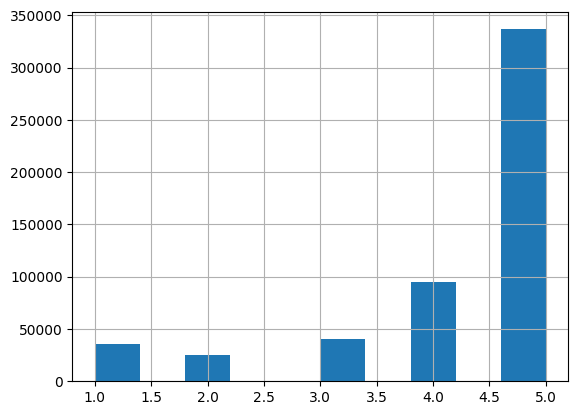

In [43]:
df_all_data_filtered_processed['review'].hist()
plt.show()
#Add axes.

In [44]:
df_all_data_filtered_processed.isna().sum()

title                  0
user_id           125883
helpfulness            0
review                 0
text                   0
review_year            0
authors             6193
publisher          84038
categories         67161
published_year         0
num_reviews            0
dtype: int64

In [45]:
df_all_data_filtered_processed.sample(10)

,title,user_id,helpfulness,review,text,review_year,authors,publisher,categories,published_year,num_reviews
162122,Fascinating womanhood,A2KNSB4ME91I9,0.400000,1.0,it's not even worth the bother to repeat the b...,2009,[Dixie Andelin Forsyth],"Axicon Circle, LLC",[Family & Relationships],2021,945
392010,Earth Abides,A2UJC7KK6QEN0N,0.000000,5.0,"Warning before you read, no cannibals or massa...",2013,[George.R. Stewart],Hachette UK,[Fiction],2015,922
146089,Out of the Dust,A2LAKOSOD22AEN,1.000000,4.0,*Out of the Dust*After reading Out of the Dust...,2005,[Karen Hesse],Scholastic Inc.,[Juvenile Fiction],2012,896
332374,Catch-22,A1O1R8ZE0KQZO,0.666667,4.0,"My name is Kayleigh Gunnoud, and I am a senior...",2005,[Joseph Heller],Simon and Schuster,[Fiction],2010,2085
513148,"Rich Dad, Poor Dad",AJBILEN1U2734,0.000000,4.0,"I'd have to say this book, as said before, wou...",2007,[Sharon L. Lechter],Techpr Incorporated,[Business & Economics],1998,2734
439227,Harper Lee's To Kill a Mockingbird (Barron's B...,NaN,0.000000,2.0,The book was not good the only reason I read i...,1999,"[Joyce Milton, Harper Lee]",Turtleback Books,[Juvenile Nonfiction],1984,2396
410948,Adventures of Huckleberry Finn,NaN,0.666667,4.0,I am a very big fan of Mark Twain and Garrison...,1999,[Mark Twain],Courier Corporation,[Fiction],1994,1553
305101,Harry Potter and the Chamber of Secrets,NaN,0.500000,5.0,When my sister first started reading this book...,2000,[J. K. Rowling],Raincoast Books,[Juvenile Fiction],1999,3137
17033,The Greatest Generation,A28AZSYCO9P62F,0.823529,1.0,"So Tom Brokaw, Famous Television Celebrity, de...",1999,[Tom Brokaw],Delta,[History],2001,1587
293412,Wuthering Heights,A3FWGSJ3T3N5QW,1.000000,4.0,Wuthering Heights is beautifully written. I fe...,2010,[Emily Bronte],Library of Alexandria,None,1981,10780


In [46]:
df_all_data_filtered_processed = df_all_data_filtered_processed.drop_duplicates(subset=['title','user_id', 'review', 'text'])

In [47]:
df_all_data_filtered_processed = df_all_data_filtered_processed.reset_index()

In [48]:
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339620 entries, 0 to 339619
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           339620 non-null  int64  
 1   title           339620 non-null  object 
 2   user_id         253152 non-null  object 
 3   helpfulness     339620 non-null  float64
 4   review          339620 non-null  float64
 5   text            339620 non-null  object 
 6   review_year     339620 non-null  int64  
 7   authors         334206 non-null  object 
 8   publisher       282177 non-null  object 
 9   categories      309345 non-null  object 
 10  published_year  339620 non-null  int64  
 11  num_reviews     339620 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 31.1+ MB


In [49]:
#Recomendacion de Manu para procesamiento
df_all_data_filtered_processed['num_row'] = np.arange(len(df_all_data_filtered_processed))

df_reduced = df_all_data_filtered_processed[['num_row', 'text']].copy()

df_reduced.sample(10)

,num_row,text
52431,52431,I'm not a big fan of flaming anyone--this book...
44737,44737,This book arrived on time and in good conditio...
2591,2591,"In a terrifying atmosphere of totalitarianism,..."
150012,150012,Harry potter is back in the second book in the...
339229,339229,"As described. Old, used copy of the Hobbit wit..."
305557,305557,Alot of the bad reviews here are based on two ...
225975,225975,This is a huge book at around 1500 pages. It i...
144899,144899,As an English teacher as well as parent to sev...
69144,69144,Today's literary environment is filled with bo...
36337,36337,"The book starts out boringly, but as we move o..."


In [50]:
df_all_data_filtered_processed.to_csv('../data/processed/filtered_data_processed.csv')

In [51]:
df_reduced.to_csv('../data/processed/df_reduced.csv')